<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

In [1]:
import time
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from math import inf
np.random.seed(42)

x = sp.symbols('x', real=True)

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [2]:
def f(x):
    return x**2 - 30*x + 1
def g(x):
    return -x**3 + 5*x - 7*x**2 + 17
def h(x):
    if x == 0:
        return np.nan
    return x**2 - 1/x
def j(x):
    if x == 0:
        return np.nan
    return 1/x**5 + x**17 + 8

In [3]:
f_der = sp.diff(f(x), x)
extr_f = sp.solve(f_der, x)
f_extremums = [(point, f(x).subs(x, point)) for point in extr_f]
print("Экстремумы функции f(x):", f_extremums)

Экстремумы функции f(x): [(15, -224)]


In [4]:
# point = f_der.evalf(2, subs={x: 1})

In [5]:
g_der = sp.diff(g(x), x)
extr_g = sp.solve(g_der, x)
g_extremums = [(point.evalf(3), g(x).evalf(4, subs={x: point})) for point in extr_g]
print("Экстремумы функции g(x):", g_extremums)

Экстремумы функции g(x): [(-5.00, -58.00), (0.333, 17.85)]


In [6]:
h_der = sp.diff(h(x), x)
extr_h = sp.solve(h_der, x)
h_extremums = [(point.evalf(3), h(x).evalf(4, subs={x: point})) for point in extr_h]
print("Критические точки h(x):", [point.evalf(3) for point in extr_h])
print("Экстремумы функции h(x):", h_extremums)

Критические точки h(x): [-0.794]
Экстремумы функции h(x): [(-0.794, 1.890)]


In [7]:
j_der = sp.diff(j(x), x)
extr_j = sp.solve(j_der, x)
j_extremums = [(point.evalf(3), j(x).evalf(4, subs={x: point})) for point in extr_j]
print("Критические точки j(x):", [point.evalf(3) for point in extr_j])
print("Экстремумы функции j(x):", j_extremums)

Критические точки j(x): [-0.946, 0.946]
Экстремумы функции j(x): [(-0.946, 6.291), (0.946, 9.709)]


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [8]:
f_double_der = sp.diff(f_der, x)
points_f = sp.solve(f_double_der, x)
inflection_points_f = [(point.evalf(3), f(x).evalf(4, subs={x: point})) for point in points_f]

g_double_der = sp.diff(sp.diff(g(x), x), x)
points_g = sp.solve(g_double_der, x)
inflection_points_g = [(point.evalf(3), g(x).evalf(4, subs={x: point})) for point in points_g]

h_double_der = sp.diff(sp.diff(h(x), x), x)
points_h = sp.solve(h_double_der, x)
inflection_points_h = [(point, h(x).subs(x, point)) for point in points_h]

j_double_der = sp.diff(sp.diff(j(x), x), x)
points_j = sp.solve(j_double_der, x)
points_j = [expr for expr in points_j if expr.is_real]
inflection_points_j = [(point.evalf(3), j(x).subs(x, point)) for point in points_j]

print("Точки перегиба функции f(x):", inflection_points_f)
print("Точки перегиба функции g(x):", inflection_points_g)
print("Точки перегиба функции h(x):", inflection_points_h)
print("Точки перегиба функции j(x):", inflection_points_j)

Точки перегиба функции f(x): []
Точки перегиба функции g(x): [(-2.33, -20.07)]
Точки перегиба функции h(x): [(1, 0)]
Точки перегиба функции j(x): []


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

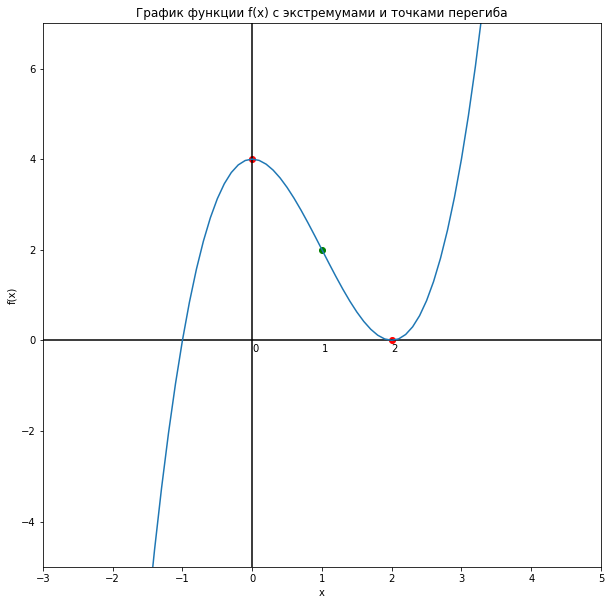

In [9]:
f_extremums

[(15, -224)]

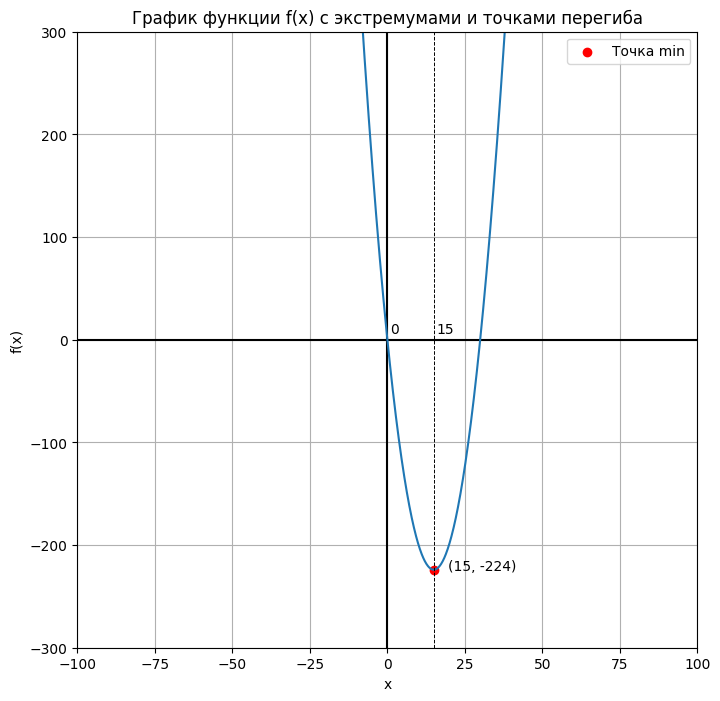

In [10]:
x_values = np.arange(-100, 100, 0.1)
f_values = [f(x) for x in x_values]

plt.figure(figsize=(8, 8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, f_values)
plt.scatter(f_extremums[0][0], f_extremums[0][1], c='red', label='Точка min')

plt.xlim([-100, 100])
plt.ylim([-300, 300])

plt.title('График функции f(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.annotate("(15, -224)", xy=(f_extremums[0][0], f_extremums[0][1]), xytext=(10, 0), textcoords='offset points')
plt.annotate(f'{f_extremums[0][0]}', xy=(f_extremums[0][0], 0), xytext=(2, 5), textcoords='offset points')
plt.annotate(f'0', xy=(0, 0), xytext=(2, 5), textcoords='offset points')
plt.axvline(x=15, color='k', linestyle='dashed', linewidth=0.7)

plt.grid()
plt.legend()
plt.show()

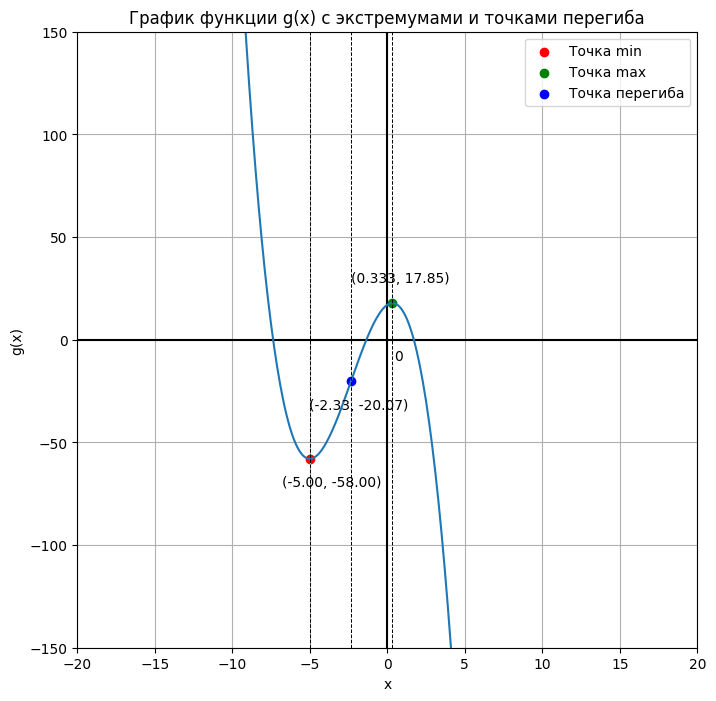

In [11]:
x_values = np.arange(-20, 20, 0.1)
g_values = [g(x) for x in x_values]

plt.figure(figsize=(8, 8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, g_values)
plt.scatter(g_extremums[0][0], g_extremums[0][1], c='red', label='Точка min')
plt.scatter(g_extremums[1][0], g_extremums[1][1], c='green', label='Точка max')
plt.scatter(inflection_points_g[0][0], inflection_points_g[0][1], c='blue', label='Точка перегиба')

plt.xlim([-20, 20])
plt.ylim([-150, 150])

plt.title('График функции g(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('g(x)')

plt.annotate(f"({g_extremums[0][0]}, {g_extremums[0][1]})", xy=(g_extremums[0][0], g_extremums[0][1]), xytext=(-20, -20), textcoords='offset points')
plt.annotate(f"({g_extremums[1][0]}, {g_extremums[1][1]})", xy=(g_extremums[1][0], g_extremums[1][1]), xytext=(-30, 15), textcoords='offset points')
plt.annotate(f"({inflection_points_g[0][0]}, {inflection_points_g[0][1]})", xy=(inflection_points_g[0][0], inflection_points_g[0][1]), xytext=(-30, -20), textcoords='offset points')

plt.annotate(f'0', xy=(0, 0), xytext=(5, -15), textcoords='offset points')

plt.axvline(x=g_extremums[0][0], color='k', linestyle='dashed', linewidth=0.7)
plt.axvline(x=g_extremums[1][0], color='k', linestyle='dashed', linewidth=0.7)
plt.axvline(x=inflection_points_g[0][0], color='k', linestyle='dashed', linewidth=0.7)

plt.grid()
plt.legend(loc='best')
plt.show()

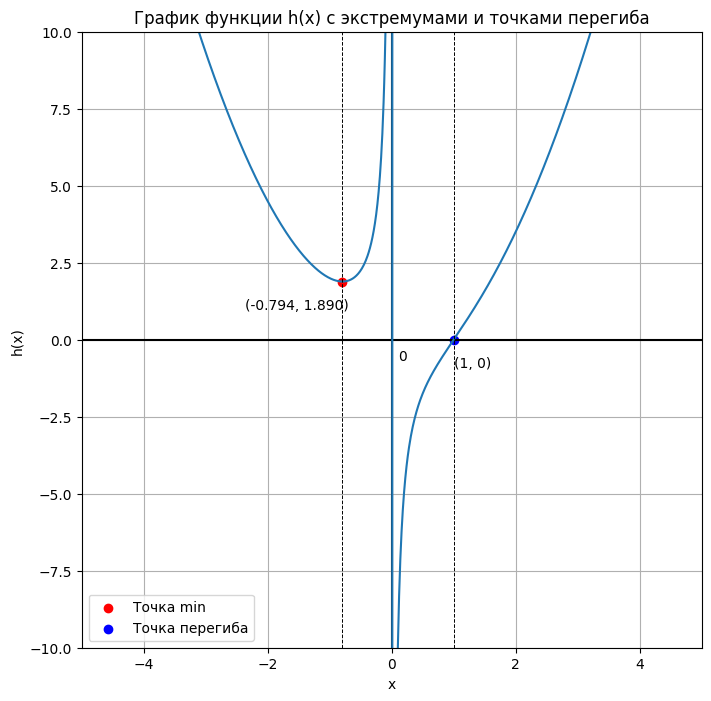

In [12]:
x_values = np.arange(-5, 5, 0.01)
h_values = [h(x) for x in x_values]

plt.figure(figsize=(8, 8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, h_values)
plt.scatter(h_extremums[0][0], h_extremums[0][1], c='red', label='Точка min')
plt.scatter(inflection_points_h[0][0], inflection_points_h[0][1], c='blue', label='Точка перегиба')

plt.xlim([-5, 5])
plt.ylim([-10, 10])

plt.title('График функции h(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('h(x)')

plt.annotate(f"({h_extremums[0][0]}, {h_extremums[0][1]})", xy=(h_extremums[0][0], h_extremums[0][1]), xytext=(-70, -20), textcoords='offset points')
plt.annotate(f"({inflection_points_h[0][0]}, {inflection_points_h[0][1]})", xy=(inflection_points_h[0][0], inflection_points_h[0][1]), xytext=(0, -20), textcoords='offset points')

plt.annotate(f'0', xy=(0, 0), xytext=(5, -15), textcoords='offset points')

plt.axvline(x=h_extremums[0][0], color='k', linestyle='dashed', linewidth=0.7)
plt.axvline(x=inflection_points_h[0][0], color='k', linestyle='dashed', linewidth=0.7)

plt.grid()
plt.legend(loc='best')
plt.show()

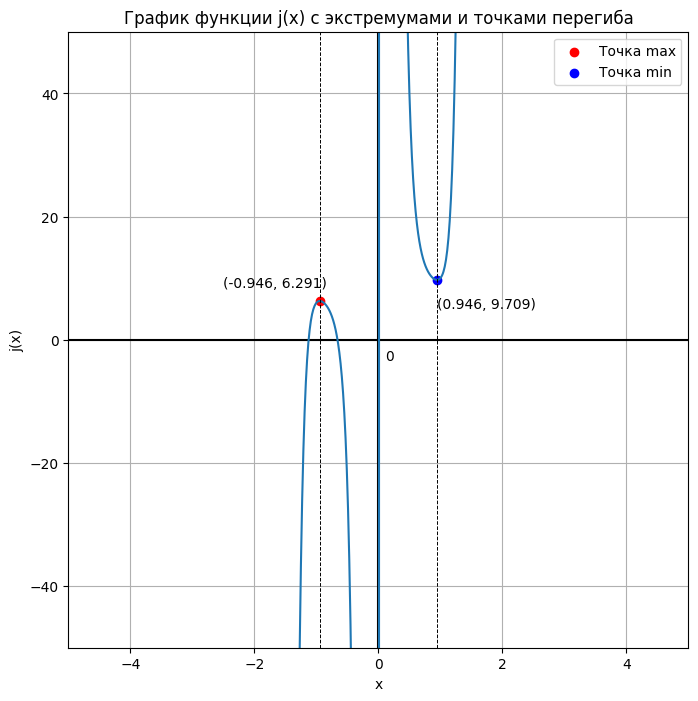

In [13]:
x_values = np.arange(-5, 5, 0.01)
j_values = [j(x) for x in x_values]

plt.figure(figsize=(8, 8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')

plt.plot(x_values, j_values)
plt.scatter(j_extremums[0][0], j_extremums[0][1], c='red', label='Точка max')
plt.scatter(j_extremums[1][0], j_extremums[1][1], c='blue', label='Точка min')

plt.xlim([-5, 5])
plt.ylim([-50, 50])

plt.title('График функции j(x) c экстремумами и точками перегиба')

plt.xlabel('x')
plt.ylabel('j(x)')

plt.annotate(f"({j_extremums[0][0]}, {j_extremums[0][1]})", xy=(j_extremums[0][0], j_extremums[0][1]), xytext=(-70, 10), textcoords='offset points')
plt.annotate(f"({j_extremums[1][0]}, {j_extremums[1][1]})", xy=(j_extremums[1][0], j_extremums[1][1]), xytext=(0, -20), textcoords='offset points')

plt.annotate(f'0', xy=(0, 0), xytext=(5, -15), textcoords='offset points')

plt.axvline(x=j_extremums[0][0], color='k', linestyle='dashed', linewidth=0.7)
plt.axvline(x=j_extremums[1][0], color='k', linestyle='dashed', linewidth=0.7)

plt.grid()
plt.legend(loc='best')
plt.show()

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [14]:
def gradient_descent(f, x_start, learning_rate, num_iterations):
    epsilon, delta = 0.00001, 0.00001

    x_curr = x_start
    df_x = sp.diff(f(x))

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        x_new = x_curr - learning_rate * df_x.subs(x, x_curr)
        trace.append(x_new.evalf(10))

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace, i

        if abs(df_x.subs(x, x_curr)) < delta:
            return x_curr, trace, i

        x_curr = x_new

    return x_curr, trace, i

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [15]:
def search_best_params(func, method, x_intervals, num_iterations):
    learning_rate_best, iter_num = 0, 0
    if x_intervals[0] == 0:
        xmin = x_intervals[1]
    else:
        xmin = x_intervals[0]
    trace = []
    for _ in range(50):
        x_start = np.random.uniform(x_intervals[0], x_intervals[1])
        # print(x_start)

        if method.__name__ == 'gradient_descent':
            for learning_rate in [0.001, 0.01, 0.05, 0.1]:
                xmin_new, trace_new, iter_new = method(func, x_start, learning_rate, num_iterations)
                if f(xmin_new) < func(xmin):
                    xmin = xmin_new
                    trace = trace_new
                    learning_rate_best = learning_rate
                    iter_num = iter_new

        elif method.__name__ == 'newton_method':
            xmin_new, trace_new, iter_new = method(func, x_start, num_iterations)
            if f(xmin_new) < func(xmin):
                xmin = xmin_new
                trace = trace_new
                iter_num = iter_new

    if method.__name__ == 'gradient_descent':
        return xmin, trace, learning_rate_best, x_start, iter_num
    elif method.__name__ == 'newton_method':
        return xmin, trace, x_start, iter_num

In [16]:
start_time = time.time()

xmin_f, trace_f, learning_rate_best_f, x_start_f, iter_f = search_best_params(f, gradient_descent, [-10, 20], 1000)
xmin_g, trace_g, learning_rate_best_g, x_start_g, iter_g = search_best_params(g, gradient_descent, [-10, 0], 1000)
xmin_h, trace_h, learning_rate_best_h, x_start_h, iter_h = search_best_params(h, gradient_descent, [-10, 0], 1000)
xmin_j, trace_j, learning_rate_best_j, x_start_j, iter_j = search_best_params(j, gradient_descent, [0, 5], 1000)

end_time = time.time()

In [17]:
print(f'Лучший (xmin, ymin) для f(x): ({xmin_f}, {f(xmin_f)})')
print(f'Локальный (xmin, ymin) для f(x): ({min(extr_f)}, {f(min(extr_f))})')
print(f'Лучшие гиперпараметры [x_start, learning_rate]: [{x_start_f}, {learning_rate_best_f}]')
print(f'Для поиска min для функции f(x) понадобилось {iter_f} итераций')

Лучший (xmin, ymin) для f(x): (15.0000402076135, -223.999999998383)
Локальный (xmin, ymin) для f(x): (15, -224)
Лучшие гиперпараметры [x_start, learning_rate]: [-4.454366334234189, 0.1]
Для поиска min для функции f(x) понадобилось 51 итераций


In [18]:
print(f'Лучший (xmin, ymin) для g(x): ({xmin_g}, {g(xmin_g)})')
print(f'Локальный (xmin, ymin) для g(x): ({min(extr_g)}, {g(min(extr_g))})')
print(f'Лучшие гиперпараметры [x_start, learning_rate]: [{x_start_g}, {learning_rate_best_g}]')
print(f'Для поиска min для функции g(x) понадобилось {iter_g} итераций')

Лучший (xmin, ymin) для g(x): (-4.99938376342347, -57.9999969622539)
Локальный (xmin, ymin) для g(x): (-5, -58)
Лучшие гиперпараметры [x_start, learning_rate]: [-8.921085730066956, 0.001]
Для поиска min для функции g(x) понадобилось 688 итераций


In [19]:
print(f'Лучший (xmin, ymin) для h(x): ({xmin_h}, {h(xmin_h)})')
print(f'Локальный (xmin, ymin) для h(x): ({min(extr_h).round(10)}, {h(min(extr_h)).round(10)})')
print(f'Лучшие гиперпараметры [x_start, learning_rate]: [{x_start_h}, {learning_rate_best_h}]')
print(f'Для поиска min для функции h(x) понадобилось {iter_h} итераций')

Лучший (xmin, ymin) для h(x): (-1.39875416162800, 2.67143511692254)
Локальный (xmin, ymin) для h(x): (-0.7937005260, 1.8898815748)
Лучшие гиперпараметры [x_start, learning_rate]: [-7.213535357633885, 0.001]
Для поиска min для функции h(x) понадобилось 999 итераций


In [20]:
print(f'Лучший (xmin, ymin) для j(x): ({xmin_j}, {j(xmin_j)})')
print(f'Локальный (xmin, ymin) для j(x): ({max(extr_j).round(10)}, {j(max(extr_j)).round(10)})')
print(f'Лучшие гиперпараметры [x_start, learning_rate]: [{x_start_j}, {learning_rate_best_j}]')
print(f'Для поиска min для функции j(x) понадобилось {iter_j} итераций')

Лучший (xmin, ymin) для j(x): (0.945953059188753, 9.70908828623578)
Локальный (xmin, ymin) для j(x): (0.9458926861, 9.7090879903)
Лучшие гиперпараметры [x_start, learning_rate]: [3.899377729288119, 0.001]
Для поиска min для функции j(x) понадобилось 30 итераций


In [21]:
def draw_functions(func, xmin, x_intervals, y_intervals, trace, method_name):
    f_xmin = func(xmin).evalf(5)

    # x_values = [x for x in np.arange(x_intervals[0], x_intervals[1], 0.1)]
    x_values = np.arange(-20, 20, 0.01)
    f_values = [func(x) for x in x_values]

    plt.figure(figsize=(6, 6))

    plt.axvline(x=0, c = 'black')
    plt.axhline(y=0, c = 'black')

    plt.plot(x_values, f_values)

    plt.xlim(x_intervals)
    plt.ylim(y_intervals)

    plt.title(f'График функции {func.__name__}(x) и локальный минимум')

    plt.xlabel('x')
    plt.ylabel(f'{func.__name__}(x)')

    trace_values = [func(x) for x in trace[:-1]]
    plt.scatter(trace[:-1], trace_values, c='red', s=5)
    plt.scatter(trace[-1], func(trace[-1]), c='green', s=10, label=f'{method_name} min')

    plt.annotate(f"({xmin}, {f_xmin})", xy=(xmin, f_xmin), xytext=(0, -20), textcoords='offset points')

    plt.annotate(f'{xmin}', xy=(xmin, 0), xytext=(5, -15), textcoords='offset points')
    plt.annotate(f'0', xy=(0, 0), xytext=(5, -15), textcoords='offset points')

    plt.axvline(x=xmin, color='k', linestyle='dashed', linewidth=0.7)

    plt.grid()
    plt.legend(loc='best')

    plt.show()


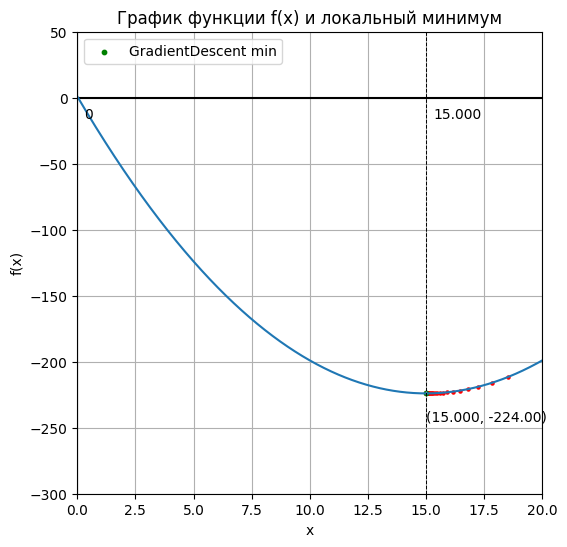

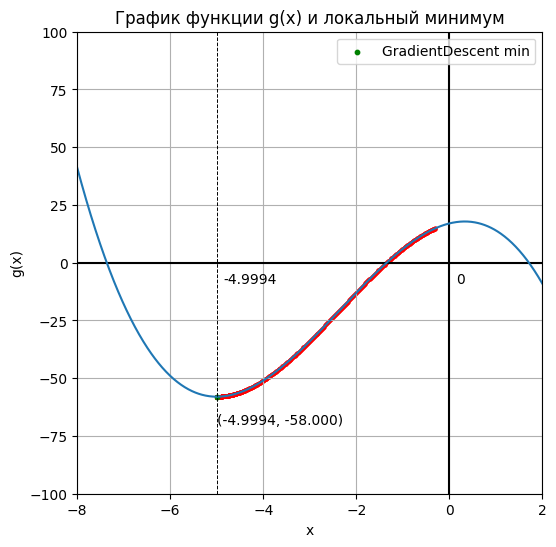

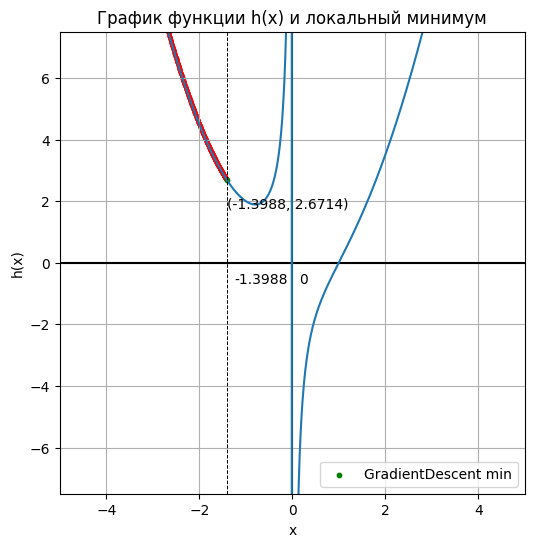

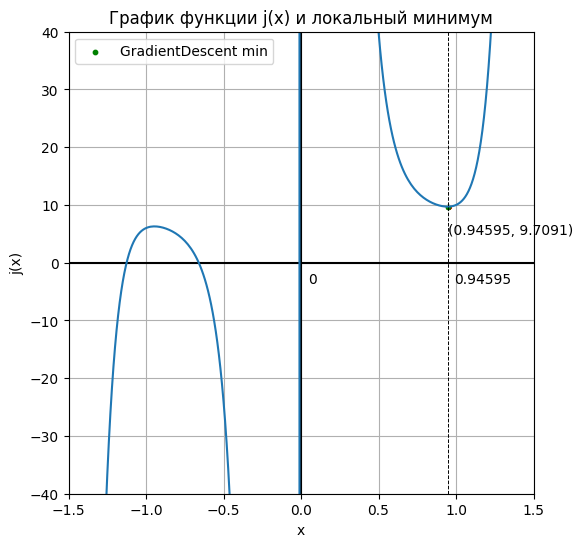

In [22]:
draw_functions(f, xmin_f.evalf(5), [0, 20], [-300, 50], trace_f, 'GradientDescent')
draw_functions(g, xmin_g.evalf(5), [-8, 2], [-100, 100], trace_g, 'GradientDescent')
draw_functions(h, xmin_h.evalf(5), [-5, 5], [-7.5, 7.5], trace_h, 'GradientDescent')
draw_functions(j, xmin_j.evalf(5), [-1.5, 1.5], [-40, 40], trace_j, 'GradientDescent')

Так как функция градиентного спуска не отлавливает локалильные минимумы и плохо реагирует на разрывы, я ограничил интервал начального приближения для каждой из четырех функций. Таким образом, у меня всегда найдется локальный минимум. При помощи функции `search_best_params` я нашел лучшие `x_start` и `learning_rate`, но для того, чтобы градиентный спуск работал лучше, нужно дополнительно правильно подобрать еще `delta` и `epsilon`.

Ниже приведен пример для функции `g(x)` без ограничения `x_start`. Если не ограничивать интервал начального приближения, то получим следуюшие результаты.

In [23]:
xmin_h_2, trace_h_2, learning_rate_best_h_2, x_start_h_2, iter_h_2 = search_best_params(h, gradient_descent, [-20, 20], 1000)

In [24]:
print(f'Лучший (xmin, ymin) для h(x): ({xmin_h_2.round(5)}, {h(xmin_h_2).round(5)})')
print(f'Локальный (xmin, ymin) для h(x): ({min(extr_h).evalf(5)}, {h(min(extr_h)).evalf(5)})')
print(f'Лучшие гиперпараметры [x_start, learning_rate]: [{x_start_h_2}, {learning_rate_best_h_2}]')
print(f'Для поиска min для функции h(x) понадобилось {iter_h_2} итераций')

Лучший (xmin, ymin) для h(x): (1.86041, 2.92362)
Локальный (xmin, ymin) для h(x): (-0.79370, 1.8899)
Лучшие гиперпараметры [x_start, learning_rate]: [14.120378218694405, 0.001]
Для поиска min для функции h(x) понадобилось 999 итераций


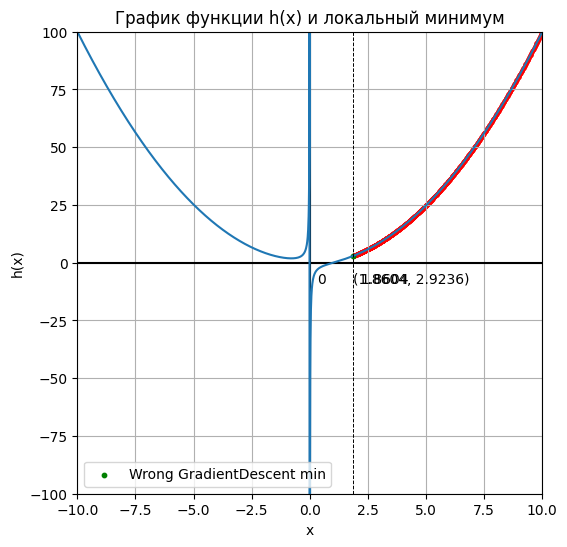

In [25]:
draw_functions(h, xmin_h_2.evalf(5), [-10, 10], [-100, 100], trace_h_2, 'Wrong GradientDescent')

На графике выше видно, что градиентный спуск остановился где-то в области точки перегиба, единственный экстремум - точку минимума пропустил и не среагировал на то, что функция не непрерывная.

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [26]:
def newton_method(func, x_start, num_iterations):
    epsilon = 0.00001
    x_curr = x_start
    df_x = sp.diff(func(x))
    df_double_x = sp.diff(df_x)
    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        first_der = df_x.subs(x, x_curr)
        second_der = df_double_x.subs(x, x_curr)

        x_new = x_curr - first_der / second_der
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace, i

        x_curr = x_new

        # print(x_curr)
    return x_curr, trace, i

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

In [27]:
time_for_newton = time.time()

xmin_f_newton, trace_f_newton, x_start_f_newton, iter_f_newton = search_best_params(f, newton_method, [-10, 20], 1000)
xmin_g_newton, trace_g_newton, x_start_g_newton, iter_g_newton = search_best_params(g, newton_method, [-10, 0], 1000)
xmin_h_newton, trace_h_newton, x_start_h_newton, iter_h_newton = search_best_params(h, newton_method, [-10, 0], 1000)
xmin_j_newton, trace_j_newton, x_start_j_newton, iter_j_newton = search_best_params(j, newton_method, [0, 5], 1000)

end_time_for_newton = time.time()

In [28]:
print(f'Лучший (xmin, ymin) для f(x): ({xmin_f_newton}, {f(xmin_f_newton)})')
print(f'Локальный (xmin, ymin) для f(x): ({min(extr_f)}, {f(min(extr_f))})')
print(f'Лучшие гиперпараметры [x_start]: [{x_start_f_newton}]')
print(f'Для поиска min для функции f(x) понадобилось {iter_f_newton} итераций')

Лучший (xmin, ymin) для f(x): (15.0000000000000, -224.000000000000)
Локальный (xmin, ymin) для f(x): (15, -224)
Лучшие гиперпараметры [x_start]: [-7.43957605018696]
Для поиска min для функции f(x) понадобилось 1 итераций


In [29]:
print(f'Лучший (xmin, ymin) для g(x): ({xmin_g_newton}, {g(xmin_g_newton)})')
print(f'Локальный (xmin, ymin) для g(x): ({min(extr_g)}, {g(min(extr_g))})')
print(f'Лучшие гиперпараметры [x_start]: [{x_start_g_newton}]')
print(f'Для поиска min для функции g(x) понадобилось {iter_g_newton} итераций')

Лучший (xmin, ymin) для g(x): (-5.00000000006841, -58.0000000000000)
Локальный (xmin, ymin) для g(x): (-5, -58)
Лучшие гиперпараметры [x_start]: [-3.7414008428576366]
Для поиска min для функции g(x) понадобилось 5 итераций


In [30]:
print(f'Лучший (xmin, ymin) для h(x): ({xmin_h_newton}, {h(xmin_h_newton)})')
print(f'Локальный (xmin, ymin) для h(x): ({min(extr_h).round(10)}, {h(min(extr_h)).round(10)})')
print(f'Лучшие гиперпараметры [x_start]: [{x_start_h_newton}]')
print(f'Для поиска min для функции h(x) понадобилось {iter_h_newton} итераций')

Лучший (xmin, ymin) для h(x): (-0.793700525793472, 1.88988157484231)
Локальный (xmin, ymin) для h(x): (-0.7937005260, 1.8898815748)
Лучшие гиперпараметры [x_start]: [-2.4545712591531768]
Для поиска min для функции h(x) понадобилось 11 итераций


In [31]:
print(f'Лучший (xmin, ymin) для j(x): ({xmin_j_newton}, {j(xmin_j_newton)})')
print(f'Локальный (xmin, ymin) для j(x): ({max(extr_j).round(10)}, {j(max(extr_j)).round(10)})')
print(f'Лучшие гиперпараметры [x_start]: [{x_start_j_newton}]')
print(f'Для поиска min для функции j(x) понадобилось {iter_j_newton} итераций')

Лучший (xmin, ymin) для j(x): (0.945893032708410, 9.70908799028127)
Локальный (xmin, ymin) для j(x): (0.9458926861, 9.7090879903)
Лучшие гиперпараметры [x_start]: [0.4175035834933438]
Для поиска min для функции j(x) понадобилось 8 итераций


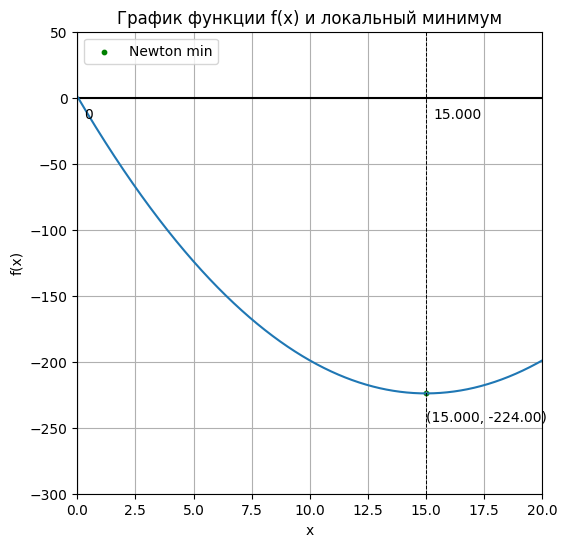

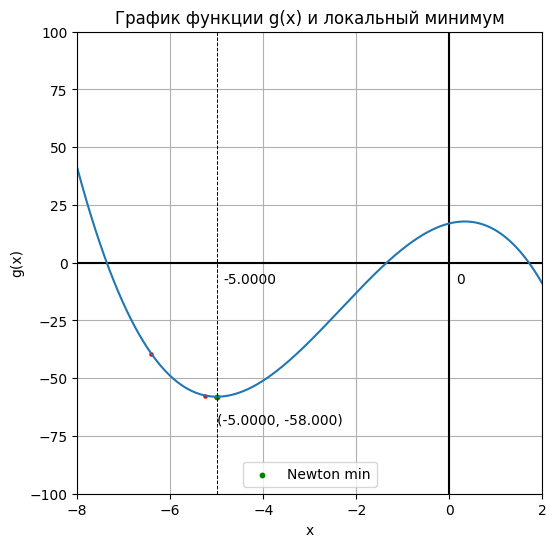

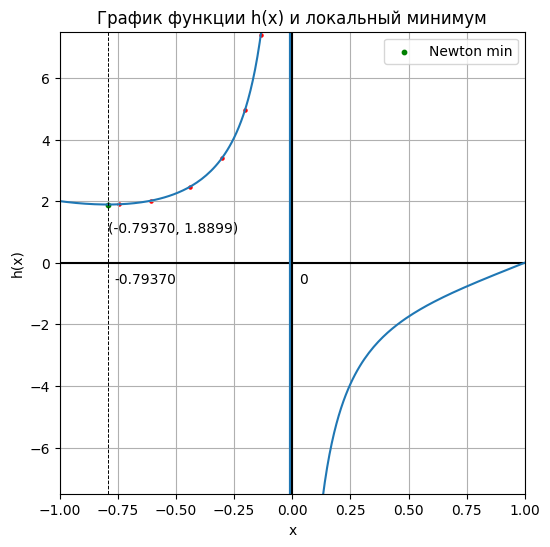

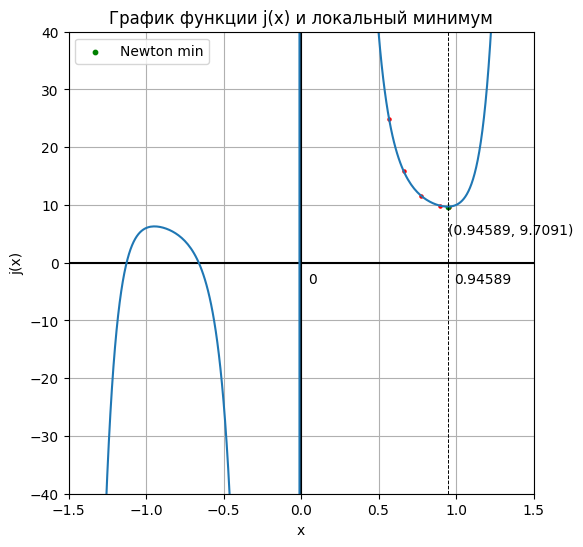

In [32]:
draw_functions(f, xmin_f_newton.evalf(5), [0, 20], [-300, 50], trace_f_newton, 'Newton')
draw_functions(g, xmin_g_newton.evalf(5), [-8, 2], [-100, 100], trace_g_newton, 'Newton')
draw_functions(h, xmin_h_newton.evalf(5), [-1, 1], [-7.5, 7.5], trace_h_newton, 'Newton')
draw_functions(j, xmin_j_newton.evalf(5), [-1.5, 1.5], [-40, 40], trace_j_newton, 'Newton')

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [33]:
print((abs(xmin_f_newton - min(extr_f)) < 0.00001) and (abs(xmin_f - min(extr_f)) < 0.00001))
print((abs(xmin_g_newton - min(extr_g)) < 0.00001) and (abs(xmin_g - min(extr_g)) < 0.00001))
print((abs(xmin_h_newton - min(extr_h)) < 0.00001) and (abs(xmin_h - min(extr_h)) < 0.00001))
print((abs(xmin_j_newton - min(extr_j)) < 0.00001) and (abs(xmin_j - min(extr_j)) < 0.00001))

False
False
False
False


In [34]:
print((abs(xmin_f_newton - min(extr_f)) < 0.00001))
print((abs(xmin_g_newton - min(extr_g)) < 0.00001))
print((abs(xmin_h_newton - min(extr_h)) < 0.00001))
print((abs(xmin_j_newton - min(extr_j)) < 0.00001))

True
True
True
False


В моем случае точность решения оказалась невысокой, и процесс подбора гиперпараметров занимал много времени. К сожалению, не удалось достичь уровня точности $|x_{found}-x_{true}|<10^{-5}$. Однако стоит отметить, что подбор гиперпараметров с использованием метода Ньютона оказался быстрее по сравнению с градиентным спуском. Для некоторых функций метод Ньютона продемонстрировал заявленную точность. Тем не менее, несмотря на эти результаты, я буду предполагать, что сравнение двух методов возможно. Точность достигалась не везде, так как она сильно зависела от интервала приближения, который я выбирал на основе предварительного ручного поиска экстремумов. Далее, несмотря на этот недостаток, я проведу анализ на время и точность двух методов.

In [35]:
avg_time_GD = (end_time - start_time) / 4
avg_time_newton = (end_time_for_newton - time_for_newton) / 4
avg_iter_num_GD = (iter_f + iter_g + iter_h + iter_j) / 4
avg_iter_num_newton = (iter_f_newton + iter_g_newton + iter_h_newton + iter_j_newton) / 4

In [36]:
print(f'Среднее время выполнения градиентного спуска: {avg_time_GD}')
print(f'Среднее время выполнения метода Ньютона: {avg_time_newton}')
print(f'Среднее кол-во итераций для градиентного спуска: {avg_iter_num_GD}')
print(f'Среднее кол-во итераций для метода Ньютона: {avg_iter_num_newton}')

Среднее время выполнения градиентного спуска: 142.79355484247208
Среднее время выполнения метода Ньютона: 0.8132461905479431
Среднее кол-во итераций для градиентного спуска: 442.0
Среднее кол-во итераций для метода Ньютона: 6.25


In [37]:
xmin_f, trace_f, learning_rate_best_f, x_start_f, iter_f = search_best_params(f, gradient_descent, [-10, 20], 10)
xmin_g, trace_g, learning_rate_best_g, x_start_g, iter_g = search_best_params(g, gradient_descent, [-10, 0], 10)
xmin_h, trace_h, learning_rate_best_h, x_start_h, iter_h = search_best_params(h, gradient_descent, [-10, 0], 10)
xmin_j, trace_j, learning_rate_best_j, x_start_j, iter_j = search_best_params(j, gradient_descent, [0, 5], 10)

xmin_f_newton, trace_f_newton, x_start_f_newton, iter_f_newton = search_best_params(f, newton_method, [-10, 20], 10)
xmin_g_newton, trace_g_newton, x_start_g_newton, iter_g_newton = search_best_params(g, newton_method, [-10, 0], 10)
xmin_h_newton, trace_h_newton, x_start_h_newton, iter_h_newton = search_best_params(h, newton_method, [-10, 0], 10)
xmin_j_newton, trace_j_newton, x_start_j_newton, iter_j_newton = search_best_params(j, newton_method, [0, 5], 10)

In [38]:
print(f'Лучший xmin для f(x): {xmin_f} (градиентный спуск)')
print(f'Лучший xmin для f(x): {xmin_f_newton} (метод Ньютона)')
print(f'Локальный xmin для f(x): {min(extr_f)}')

Лучший xmin для f(x): 15.1135990766809 (градиентный спуск)
Лучший xmin для f(x): 15.0000000000000 (метод Ньютона)
Локальный xmin для f(x): 15


In [39]:
print(f'Лучший xmin для g(x): {xmin_g} (градиентный спуск)')
print(f'Лучший xmin для g(x): {xmin_g_newton} (метод Ньютона)')
print(f'Локальный xmin для g(x): {min(extr_g)}')

Лучший xmin для g(x): -3.21366412248718 (градиентный спуск)
Лучший xmin для g(x): -5.00000000171667 (метод Ньютона)
Локальный xmin для g(x): -5


In [40]:
print(f'Лучший xmin для h(x): {xmin_h} (градиентный спуск)')
print(f'Лучший xmin для h(x): {xmin_h_newton} (метод Ньютона)')
print(f'Локальный xmin для h(x): {min(extr_h).round(10)}')

Лучший xmin для h(x): -1.72296467661128 (градиентный спуск)
Лучший xmin для h(x): -0.637906120780051 (метод Ньютона)
Локальный xmin для h(x): -0.7937005260


In [41]:
print(f'Лучший xmin для j(x): {xmin_j} (градиентный спуск)')
print(f'Лучший xmin для j(x): {xmin_j_newton} (метод Ньютона)')
print(f'Локальный xmin для j(x): {min(extr_j).round(10)}')

Лучший xmin для j(x): 0.880169112620745 (градиентный спуск)
Лучший xmin для j(x): 1.56128028845218 (метод Ньютона)
Локальный xmin для j(x): -0.9458926861


В основном более точный результат при фиксированном числе итераций $N=10$ дает метод Ньютона.

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [401]:
def momentum_gradient_descent(func, x_start, alpha, beta, num_iterations):
    epsilon, delta = 0.001, 0.001

    x_curr, x_prev = x_start, 0
    df_x = sp.diff(func(x))

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        x_new = x_curr - alpha * df_x.subs(x, x_curr).evalf(5) + beta * (x_curr - x_prev)

        trace.append(x_new)

        if (abs(x_new - x_curr) < epsilon) or (abs(x_new - x_curr) > 1000):
            return x_curr, trace, i

        if abs(df_x.subs(x, x_curr).evalf(5)) < delta:
            return x_curr, trace, i

        x_prev, x_curr = x_curr, x_new

    return x_curr, trace, i

In [409]:
def momentum_search_params(func, num_iterations, intervals):
    list_of_params = [0.001, 0.005, 0.01, 0.05, 0.1]

    iter_num, best_alpha, best_beta, best_start = 0, 0, 0, 0
    trace = []

    for _ in range(10):
        x_start = np.random.uniform(intervals[0], intervals[1])
        xmin = np.random.uniform(intervals[0], intervals[1])

        for alpha in list_of_params:
            for beta in list_of_params:

                xmin_new, trace_new, iter_new = momentum_gradient_descent(func, x_start, alpha, beta, num_iterations)
                if func(xmin_new) < func(xmin):
                    xmin = xmin_new
                    trace = trace_new
                    iter_num = iter_new
                    best_alpha = alpha
                    best_beta = beta
                    best_start = x_start

    return xmin, trace, iter_num, best_alpha, best_beta, best_start

In [410]:
xmin_f_momentum, trace_f_momentum, iter_num_f_momentum, best_alpha_f, best_beta_f, start_f = momentum_search_params(f, 100, [-10, 20])
xmin_g_momentum, trace_g_momentum, iter_num_g_momentum, best_alpha_g, best_beta_g, start_g = momentum_search_params(g, 100, [-10, 0])
xmin_h_momentum, trace_h_momentum, iter_num_h_momentum, best_alpha_h, best_beta_h, start_h = momentum_search_params(h, 100, [-5, 0])
xmin_j_momentum, trace_j_momentum, iter_num_j_momentum, best_alpha_j, best_beta_j, start_j = momentum_search_params(j, 100, [0, 5])

In [411]:
print(f'Лучший (xmin, ymin) для f(x): ({xmin_f_momentum}, {f(xmin_f_momentum)})')
print(f'Локальный (xmin, ymin) для f(x): ({min(extr_f)}, {f(min(extr_f))})')
print(f'Лучшие гиперпараметры [alpha, beta, x_start]: [{best_alpha_f}, {best_beta_f}, {start_f}]')
print(f'Для поиска min для функции f(x) понадобилось {iter_num_f_momentum} итераций')

Лучший (xmin, ymin) для f(x): (14.9961752668896, -223.999985371417)
Локальный (xmin, ymin) для f(x): (15, -224)
Лучшие гиперпараметры [alpha, beta, x_start]: [0.1, 0.05, 11.737948605428869]
Для поиска min для функции f(x) понадобилось 27 итераций


In [412]:
print(f'Лучший (xmin, ymin) для g(x): ({xmin_g_momentum}, {g(xmin_g_momentum)})')
print(f'Локальный (xmin, ymin) для g(x): ({min(extr_g)}, {g(min(extr_g))})')
print(f'Лучшие гиперпараметры [alpha, beta, x_start]: [{best_alpha_g}, {best_beta_g}, {start_g}]')
print(f'Для поиска min для функции g(x) понадобилось {iter_num_g_momentum} итераций')

Лучший (xmin, ymin) для g(x): (-5.00013848285394, -57.9999998465773)
Локальный (xmin, ymin) для g(x): (-5, -58)
Лучшие гиперпараметры [alpha, beta, x_start]: [0.05, 0.05, -2.247559481650507]
Для поиска min для функции g(x) понадобилось 7 итераций


In [413]:
print(f'Лучший (xmin, ymin) для h(x): ({xmin_h_momentum}, {h(xmin_h_momentum)})')
print(f'Локальный (xmin, ymin) для h(x): ({min(extr_h).round(10)}, {h(min(extr_h)).round(10)})')
print(f'Лучшие гиперпараметры [alpha, beta, x_start]: [{best_alpha_h}, {best_beta_h}, {start_h}]')
print(f'Для поиска min для функции h(x) понадобилось {iter_num_h_momentum} итераций')

Лучший (xmin, ymin) для h(x): (-0.793468537002018, 1.88988173633044)
Локальный (xmin, ymin) для h(x): (-0.7937005260, 1.8898815748)
Лучшие гиперпараметры [alpha, beta, x_start]: [0.1, 0.1, -1.468769187223689]
Для поиска min для функции h(x) понадобилось 7 итераций


In [414]:
print(f'Лучший (xmin, ymin) для j(x): ({xmin_j_momentum}, {j(xmin_j_momentum)})')
print(f'Локальный (xmin, ymin) для j(x): ({max(extr_j).round(10)}, {j(max(extr_j).round(10))})')
print(f'Лучшие гиперпараметры [alpha, beta, x_start]: [{best_alpha_j}, {best_beta_j}, {start_j}]')
print(f'Для поиска min для функции j(x) понадобилось {iter_num_j_momentum} итераций')

Лучший (xmin, ymin) для j(x): (2.233572636292602, 857048.5602457211)
Локальный (xmin, ymin) для j(x): (0.9458926861, 9.709087990)
Лучшие гиперпараметры [alpha, beta, x_start]: [0.001, 0.001, 2.233572636292602]
Для поиска min для функции j(x) понадобилось 0 итераций


## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

Нет, Momentum GD не решает проблему поиска начального приближения для функций из задания 1. При запуске на широком интервале [−20, 20] для начального приближения градиентный спуск показал хорошие результаты только для первой функции, но это понятно, поскольку это прекрасная непрерывная функция с одним экстремумом. Для остальных функций Momentum GD приводил к уходу в совершенно другом направлении и не сходился к локальному минимуму.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

Предположу, что это кот Яны!